<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/use_face_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
import numpy as np
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

In [ ]:
photos = np.load('/content/drive/MyDrive/pic_train/face_photos.npy')
labels = np.load('/content/drive/MyDrive/pic_train/face_labels.npy')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.2)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(431, 150, 150, 3) (108, 150, 150, 3)
(431,) (108,)


In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape,y_test.shape)

(431, 10) (108, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
])

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20,batch_size=64,verbose=1)

Epoch 1/20
7/7 [==============================] - 12s 191ms/step - loss: 2.7399 - accuracy: 0.1763
Epoch 2/20
7/7 [==============================] - 0s 55ms/step - loss: 1.5034 - accuracy: 0.5661
Epoch 3/20
7/7 [==============================] - 0s 51ms/step - loss: 0.3977 - accuracy: 0.9118
Epoch 4/20
7/7 [==============================] - 0s 50ms/step - loss: 0.1303 - accuracy: 0.9582
Epoch 5/20
7/7 [==============================] - 0s 62ms/step - loss: 0.0816 - accuracy: 0.9652
Epoch 6/20
7/7 [==============================] - 0s 56ms/step - loss: 0.0276 - accuracy: 0.9954
Epoch 7/20
7/7 [==============================] - 0s 57ms/step - loss: 0.0158 - accuracy: 0.9930
Epoch 8/20
7/7 [==============================] - 0s 55ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 9/20
7/7 [==============================] - 0s 51ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 10/20
7/7 [==============================] - 0s 64ms/step - loss: 6.6607e-04 - accuracy: 1.0000
Epoch 11/20
7/7 [======

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/face.h5')

In [ ]:
model1 = load_model('/content/drive/MyDrive/Colab Notebooks/face.h5')

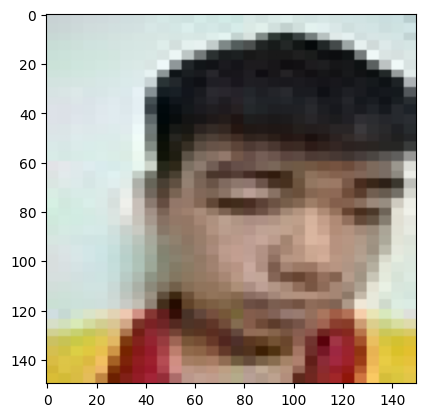

so: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
digit = x_test[30]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print("so:",y_test[30])

In [ ]:
classes = ['none', 'Thanh','dat', 'nhn', 'nhut', 'phat', 'quan', 'tan', 'tanthanh', 'tuan']
img = x_test[30]
img = np.expand_dims(img, axis=0)
res = model1.predict(img)
print("predict: ",classes[np.argmax(res[0])],(res[0]))

1/1 [==============================] - 0s 232ms/step
predict:  tuan [8.8293473e-26 2.8456661e-03 1.6971430e-17 2.4733132e-12 3.7961954e-07
 2.0028529e-06 2.0139426e-10 1.3441344e-09 1.9875098e-13 9.9715197e-01]


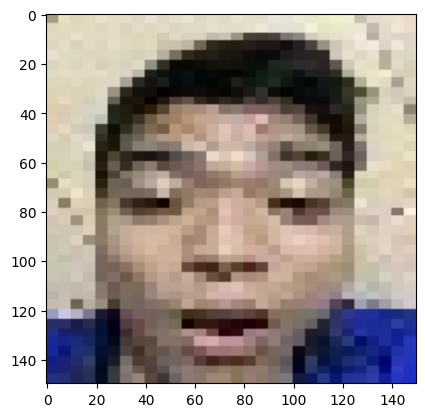

so: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 38ms/step
predict:  Thanh [2.2000753e-35 1.0000000e+00 1.0737687e-15 9.7077786e-09 1.2074457e-15
 3.5221728e-13 2.4662819e-19 7.5355204e-20 1.4432204e-18 2.2854300e-21]


In [ ]:
digit = x_test[100]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print("so:",y_test[100])

classes = ['none', 'Thanh','dat', 'nhn', 'nhut', 'phat', 'quan', 'tan', 'tanthanh', 'tuan']
img = x_test[100]
img = np.expand_dims(img, axis=0)
res = model1.predict(img)
print("predict: ",classes[np.argmax(res[0])],(res[0]))